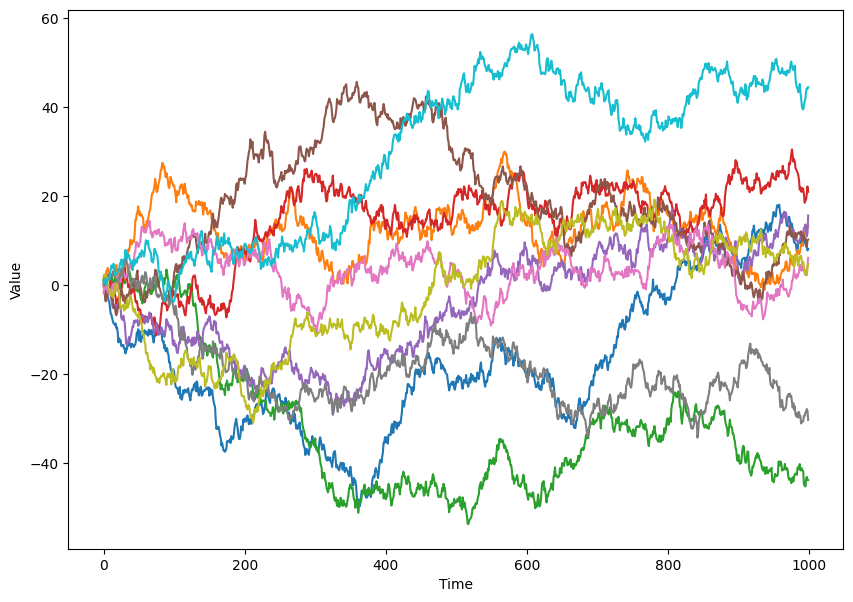

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

NUM_PATHS = 10
SAMPLES = 1000

MU = 0
SIGMA = 1

rng = np.random.default_rng()

def compute_wiener() -> list[float]:
    value = 0
    wiener = []

    for _ in range(SAMPLES):
        s = rng.normal(MU, SIGMA)
        value += s

        wiener.append(value)

    return wiener


df_data = {}
for i in range(NUM_PATHS):
    path = compute_wiener()
    df_data[f'WPath {i}'] = path

data = pd.DataFrame(df_data)

long_form = pd.melt(data.reset_index(), id_vars='index', var_name='Path', value_name='Value')
long_form.rename(columns={'index': 'Time'}, inplace=True)

plt.figure(figsize=(10, 7))
sns.lineplot(data=long_form, x='Time', y='Value', hue='Path')

plt.legend([], [], frameon=False)
plt.show()

      Time     Path     Value
0        0  WPath 0 -1.582083
1        1  WPath 0  0.216805
2        2  WPath 0  1.217659
3        3  WPath 0  0.423481
4        4  WPath 0  0.464864
...    ...      ...       ...
1995   995  WPath 1 -5.310371
1996   996  WPath 1 -5.795991
1997   997  WPath 1 -5.102256
1998   998  WPath 1 -4.944689
1999   999  WPath 1 -3.713303

[2000 rows x 3 columns]


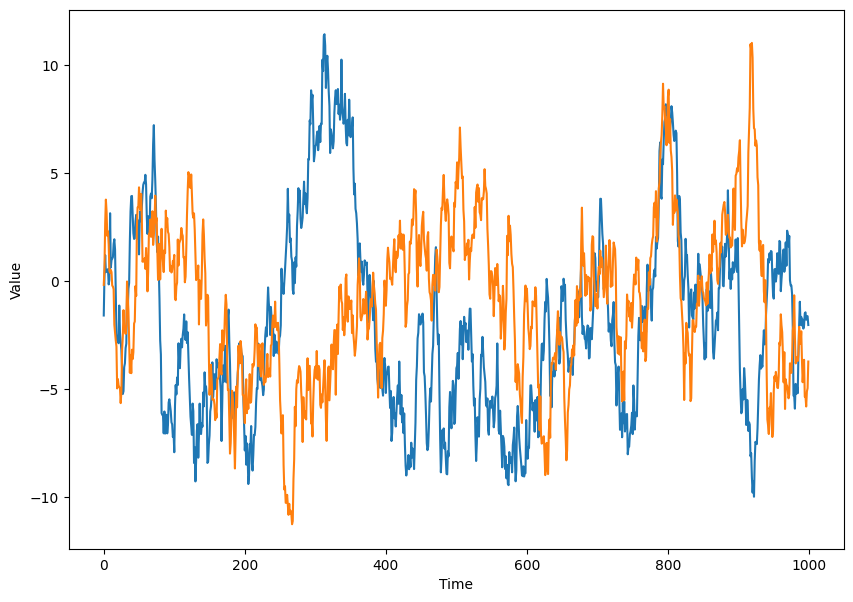

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

NUM_PATHS = 2
SAMPLES = 1000
THETA = 0.025
MEAN = 0

MU = 0
SIGMA = 1

rng = np.random.default_rng()

def compute_wiener() -> list[float]:
    value = 0
    wiener = []

    for _ in range(SAMPLES):
        mean_rev_term = -THETA * (value - MEAN)
        s = mean_rev_term + rng.normal(MU, SIGMA)
        value += s

        wiener.append(value)

    return wiener


df_data = {}
for i in range(NUM_PATHS):
    path = compute_wiener()
    df_data[f'WPath {i}'] = path

data = pd.DataFrame(df_data)

long_form = pd.melt(data.reset_index(), id_vars='index', var_name='Path', value_name='Value')
long_form.rename(columns={'index': 'Time'}, inplace=True)
print(long_form)

plt.figure(figsize=(10, 7))
sns.lineplot(data=long_form, x='Time', y='Value', hue='Path')

plt.legend([], [], frameon=False)
plt.show()

$PEP: possibly delisted; no price data found  (1m 2024-10-15 -> 2024-10-16) (Yahoo error = "1m data not available for startTime=1728964800 and endTime=1729051200. The requested range must be within the last 30 days.")
$KO: possibly delisted; no price data found  (1m 2024-10-15 -> 2024-10-16) (Yahoo error = "1m data not available for startTime=1728964800 and endTime=1729051200. The requested range must be within the last 30 days.")


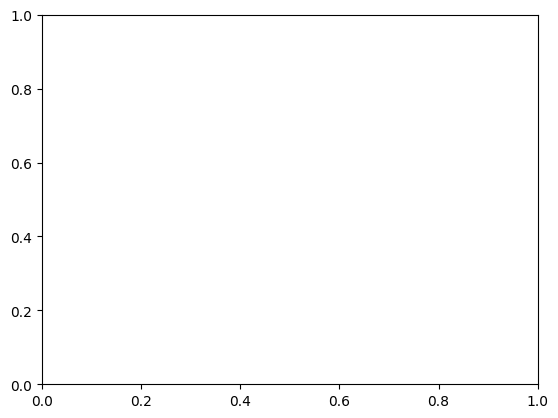

In [3]:
import yfinance

pepsi = yfinance.Ticker("PEP")
cocacola = yfinance.Ticker("KO")

START="2024-10-15"
END="2024-10-16"

pepsi_history = pepsi.history(start=START, end=END, interval="1m")
cocacola_history = cocacola.history(start=START, end=END, interval="1m")

pepsi_close_data = pepsi_history["Close"]
cocacola_close_data = cocacola_history["Close"]

spreads = []
for i in range(len(pepsi_close_data)):
    pepsi_close = pepsi_close_data.iloc[i]
    cocacola_close = cocacola_close_data.iloc[i]
    
    spread = pepsi_close - cocacola_close
    spreads.append(spread)

data = pd.DataFrame(spreads)

sns.lineplot(data=data)
plt.show()

In [4]:
import os
import math
import numpy as np
import pandas as pd

# calibrate an OU process on the spread

# identify different statistical periods and
# piece them together relative to zero?

# first, we get a mean value to revert to,
# this will be the simple arithmetic mean
# on the dataset, the variance will also
# be derived from the spreads

dataset = spreads
print(dataset)

VARIANCE = np.var(dataset)
MU = sum(dataset) / len(dataset)
EPOCHS = 100

NUM_DATASET = len(dataset)

def ou_process(theta) -> list[float]:
    value = 0
    values = []

    for _ in range(NUM_DATASET):
        brownian = rng.normal(MU, VARIANCE)
        mean_reversion = -theta * (value - MU) + math.e

        value += mean_reversion + brownian
        values.append(value)

    return values


def ou_calibration():
    theta = 0.05

    for _ in range(EPOCHS):
        values = ou_process(theta)

        # compare against dataset and find
        error = 0
        for index in range(NUM_DATASET):
            value = values[index]
            spread = dataset[index]

            error += (value - spread) ** 2

        error /= NUM_DATASET
        print(error)

        # Compute gradient



ou_calibration()

/home/filiptoth/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/filiptoth/.local/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/filiptoth/.local/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[]


ZeroDivisionError: division by zero

      Time     Path       Value
0        0  WPath 0    0.907674
1        1  WPath 0    2.102205
2        2  WPath 0    2.025320
3        3  WPath 0    0.990228
4        4  WPath 0    0.707074
...    ...      ...         ...
2511  2511  WPath 0  110.890479
2512  2512  WPath 0  111.877089
2513  2513  WPath 0  109.983892
2514  2514  WPath 0  111.790037
2515  2515  WPath 0  110.079165

[2516 rows x 3 columns]


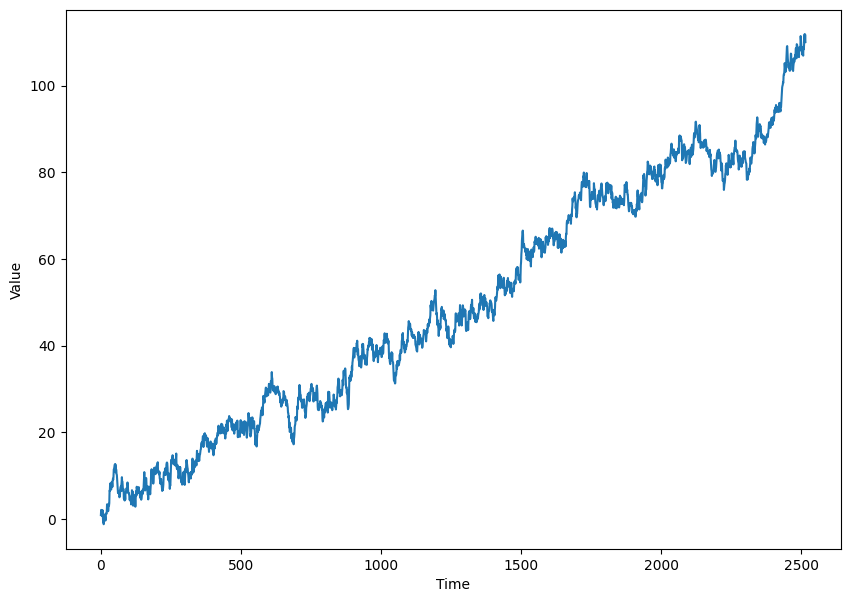

In [ ]:
# OU with deterministic drift

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

NUM_PATHS = 1
SAMPLES = 2516
THETA = 0.025
MEAN = 0
DET_DRIFT = 0.001

MU = 0
SIGMA = 1

rng = np.random.default_rng()

def compute_ou() -> list[float]:
    value = 0
    wiener = []

    for t in range(SAMPLES):
        mean_rev_term = -THETA * (value - MEAN)
        det_drift = DET_DRIFT * t

        s = mean_rev_term + rng.normal(MU, SIGMA) + det_drift
        value += s

        wiener.append(value)

    return wiener


df_data = {}
for i in range(NUM_PATHS):
    path = compute_ou()
    df_data[f'WPath {i}'] = path

data = pd.DataFrame(df_data)

long_form = pd.melt(data.reset_index(), id_vars='index', var_name='Path', value_name='Value')
long_form.rename(columns={'index': 'Time'}, inplace=True)
print(long_form)

plt.figure(figsize=(10, 7))
sns.lineplot(data=long_form, x='Time', y='Value', hue='Path')

plt.legend([], [], frameon=False)
plt.show()

Continous time OU process:
$$
X_{t} = X_{0}e^{-\theta t} + \int_{0}^{t} e^{\theta (s - t)} \theta \mu(s) \, ds + \int_{0}^{t} e^{-\theta (t - s)} \sigma dW_{s}
$$

long term mean: 10


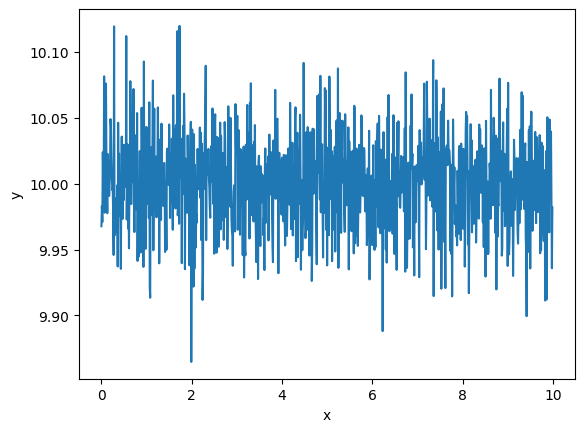

In [ ]:
# form a sample path along the continuous time OU process
import numpy as np
from scipy.integrate import quad

THETA = 1
SIGMA = 1

def mean(t):
    return 10 # t * 0.25


def deterministic_integral(s, t):
    exp = np.exp(THETA * (s - t))
    return exp * THETA * mean(s)



def ou_sample_path(x0, t, dt):
    timestamps = np.arange(0, t, dt)
    values = []

    for time in timestamps:
        # x_{0} e^{-\theta t}
        term1 = x0 * math.exp(-THETA * time)

        # deterministic part
        integral_mu, _ = quad(lambda s: deterministic_integral(s, time), 0, time)

        # stochasic integral

        # wiener process increment
        dW = np.sqrt(dt) * np.random.randn()
        ito_integral = np.exp(-THETA * (1)) * SIGMA * dW

        value = term1 + integral_mu + ito_integral
        values.append(value)

    timestamps_array = np.array(timestamps)
    return timestamps_array, values


times, vals = ou_sample_path(10, 10, 0.01)
print(f'long term mean: {mean(10)}')

df = pd.DataFrame({
    'x': times,
    'y': vals
})

sns.lineplot(data=df, x='x', y='y')
plt.show()

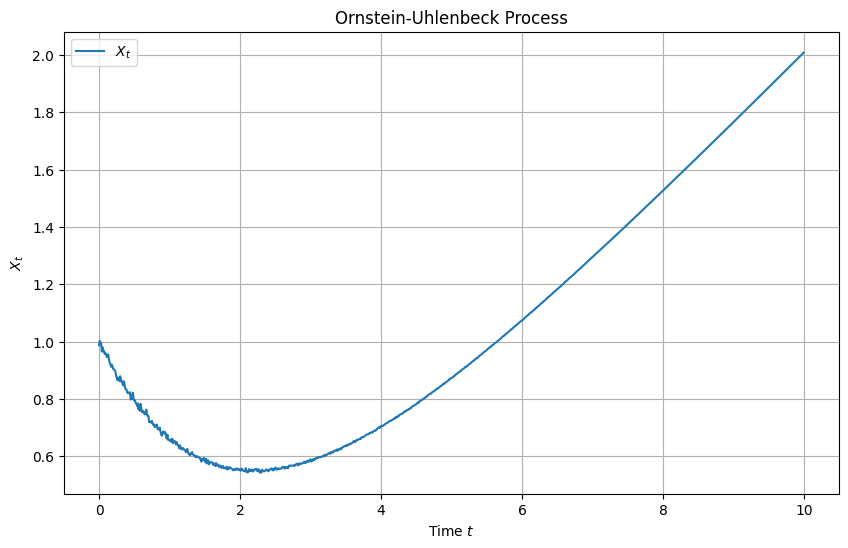

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Function for the deterministic integral part (mu(s))
def mu(s):
    return 0.25 * s  # Example, change as per your mu(s) function

# Function to simulate the OU process
def ou_process(X0, theta, sigma, t, dt=0.01):
    # Initialize time points
    time_points = np.arange(0, t, dt)
    X_values = []

    for current_time in time_points:
        # First part: X0 * e^(-theta * t)
        X_t = X0 * np.exp(-theta * current_time)

        # Second part: Integral involving mu(s)
        integral_mu, _ = quad(lambda s: np.exp(theta * (s - current_time)) * theta * mu(s), 0, current_time)
        X_t += integral_mu

        # Third part: Stochastic integral with Brownian motion increments
        dW = np.sqrt(dt) * np.random.randn()  # Wiener increment
        stochastic_integral = np.exp(-theta * (current_time)) * sigma * dW
        X_t += stochastic_integral

        X_values.append(X_t)

    return time_points, np.array(X_values)

# Example parameters
X0 = 1.0   # Initial value
theta = 0.5  # Mean reversion speed
sigma = 0.1  # Volatility
t = 10    # Time range for the plot

# Compute the OU process over time
time_points, X_values = ou_process(X0, theta, sigma, t)

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(time_points, X_values, label=r'$X_t$')
plt.title('Ornstein-Uhlenbeck Process')
plt.xlabel('Time $t$')
plt.ylabel('$X_t$')
plt.grid(True)
plt.legend()
plt.show()

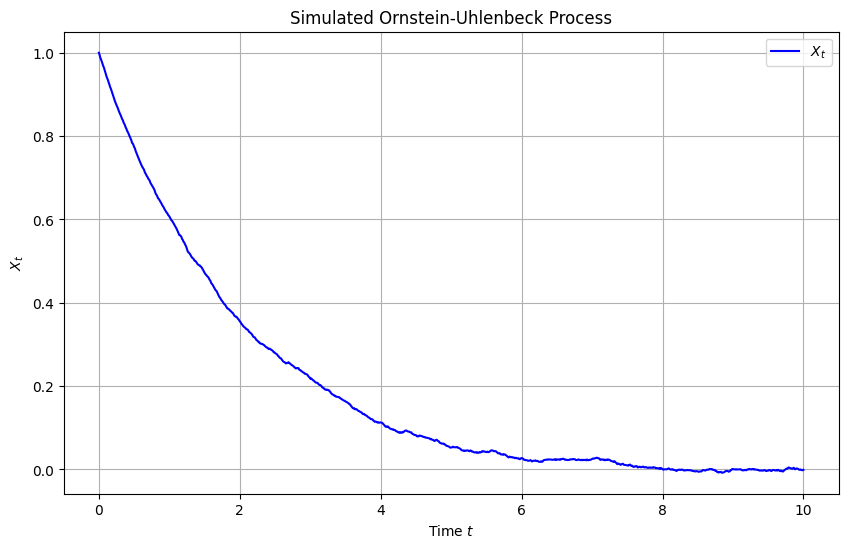

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the OU process
theta = 0  # Long-term mean
kappa = 0.5  # Mean-reversion speed
sigma = 0.1  # Volatility
X0 = 1.0  # Initial value of X
t_max = 10  # Maximum time
dt = 0.01  # Time step
n_steps = int(t_max / dt)  # Number of time steps

# Time grid
time_points = np.linspace(0, t_max, n_steps)

# Simulate the process using Euler-Maruyama method
X = np.zeros(n_steps)
X[0] = X0

# Simulating the process
for i in range(1, n_steps):
    dt = time_points[i] - time_points[i-1]
    dW = np.random.normal(0, np.sqrt(dt))  # Wiener increment (normal distribution)

    # Apply the discretized version of the SDE
    X[i] = X[i-1] * np.exp(-kappa * dt) + theta * (1 - np.exp(-kappa * dt)) + sigma * np.sqrt(dt) * dW

# Plot the process
plt.figure(figsize=(10, 6))
plt.plot(time_points, X, label=r"$X_t$", color='blue')
plt.title("Simulated Ornstein-Uhlenbeck Process")
plt.xlabel("Time $t$")
plt.ylabel("$X_t$")
plt.grid(True)
plt.legend()
plt.show()
